In [1]:
import numpy as np
np.random.seed(1234)
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x) + (np.random.randn(1000)/5)
x_train = np.linspace(0, 1, 11)
y_train = np.sin(2 * np.pi * x_train) + (np.random.randn(11)/5)
x_test = np.linspace(0, 1, 50)
y_test = np.sin(2 * np.pi * x_test) + (np.random.randn(50)/5)

In [2]:
x_poly = np.c_[ 

 x, x ** 2, x ** 3, x ** 4, x ** 5, x ** 6, x ** 7, 

 x ** 8, x ** 9, x**10

]

x_train_poly = np.c_[ 

  x_train, x_train ** 2, x_train ** 3, x_train ** 4, x_train ** 5, 

  x_train ** 6, x_train ** 7, x_train ** 8, x_train ** 9, x_train**10

]

x_test_poly = np.c_[ 

  x_test, x_test ** 2, x_test ** 3, x_test ** 4, x_test ** 5, 

  x_test ** 6, x_test ** 7, x_test ** 8, x_test ** 9, x_test**10

]

In [3]:
from sklearn.linear_model import LinearRegression
polyModel = LinearRegression().fit(x_train_poly, y_train)

In [4]:
def coefficients(model, x):
    list_ = []
    for coef in model.coef_:
        list_.append('{:0.02f}'.format(coef))
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x)
    
    coef_ = pd.DataFrame( list_, columns=['coef'] )
    col = pd.DataFrame( x.columns, columns=['columns'] )
    return pd.concat( [coef_, col], axis=1)

In [5]:
import pandas as pd
coefficients(polyModel, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,-451.74,12149.23,-127978.86,719821.22,-2423057.83,5120303.30,-6851454.73,5636082.86,-2600309.35,514896.38
columns,0,1,2,3,4,5,6,7,8,9


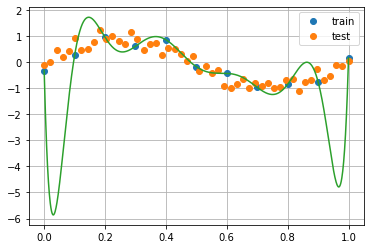

In [6]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, polyModel.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [7]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
l2model = Ridge(alpha=0).fit(x_train_poly, y_train)
coefficients(l2model, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,-461.86,12422.09,-130906.19,736592.93,-2480480.37,5243520.06,-7018597.32,5775236.42,-2665183.66,527858.39
columns,0,1,2,3,4,5,6,7,8,9


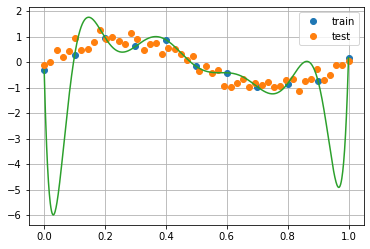

In [8]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, l2model.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [9]:
l2model = Ridge(alpha=500).fit(x_train_poly, y_train)
coefficients(l2model, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
columns,0,1,2,3,4,5,6,7,8,9


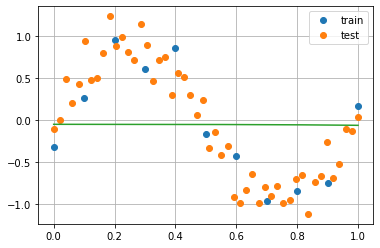

In [10]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, l2model.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [11]:
l2model = Ridge(alpha=0.0001).fit(x_train_poly, y_train)
coefficients(l2model, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,8.72,-15.74,-4.76,4.97,6.86,4.17,0.51,-1.94,-2.21,-0.11
columns,0,1,2,3,4,5,6,7,8,9


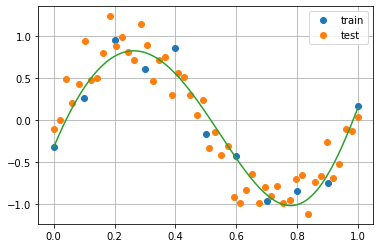

In [12]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, l2model.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [13]:
l1model = Lasso(alpha=0.0001).fit(x_train_poly, y_train)
coefficients(l1model, x_train_poly).T

C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0506176922507344, tolerance: 0.0004625291485534251
  model = cd_fast.enet_coordinate_descent(


,0,1,2,3,4,5,6,7,8,9
coef,9.11,-18.98,1.07,5.07,3.76,1.69,0.17,0.00,-0.15,-1.25
columns,0,1,2,3,4,5,6,7,8,9


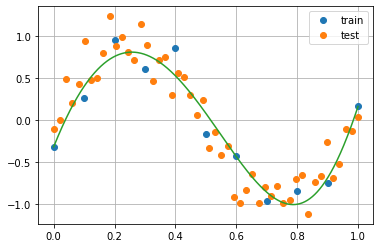

In [14]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, l1model.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [21]:
model_elastic = ElasticNet(l1_ratio=0, alpha=0.0001).fit(x_train_poly, y_train)
coefficients(model_elastic, x_train_poly).T

C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31840234975648485, tolerance: 0.0004625291485534251
  model = cd_fast.enet_coordinate_descent(


,0,1,2,3,4,5,6,7,8,9
coef,6.80,-11.59,-4.35,2.53,4.33,3.29,1.56,0.10,-0.87,-1.41
columns,0,1,2,3,4,5,6,7,8,9


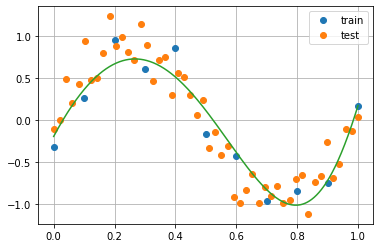

In [22]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, model_elastic.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [23]:
model_elastic = ElasticNet(l1_ratio=1, alpha=0.0001).fit(x_train_poly, y_train)
coefficients(model_elastic, x_train_poly).T

C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0506176922507344, tolerance: 0.0004625291485534251
  model = cd_fast.enet_coordinate_descent(


,0,1,2,3,4,5,6,7,8,9
coef,9.11,-18.98,1.07,5.07,3.76,1.69,0.17,0.00,-0.15,-1.25
columns,0,1,2,3,4,5,6,7,8,9


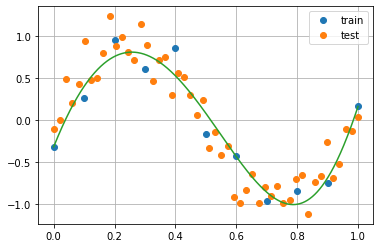

In [18]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, model_elastic.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [24]:
model_elastic = ElasticNet(l1_ratio=0.5, alpha=0.0001).fit(x_train_poly, y_train)
coefficients(model_elastic, x_train_poly).T

C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16759669816551562, tolerance: 0.0004625291485534251
  model = cd_fast.enet_coordinate_descent(


,0,1,2,3,4,5,6,7,8,9
coef,7.78,-14.64,-2.30,3.59,4.36,2.67,0.90,-0.00,-0.66,-1.28
columns,0,1,2,3,4,5,6,7,8,9


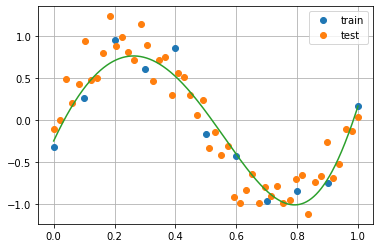

In [20]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, model_elastic.predict(x_poly))
plt.legend()
plt.grid()
plt.show()